In [1]:
import pandas as pd

df = pd.read_csv("GBvideos_cc50_202101_limpio.csv")

print(df.shape)
df.head()


(38916, 20)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515.000,55681.000,8093.75,9479.00,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529)
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.000,25561.000,2294.00,2757.00,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526)
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",8831780.375,276377.625,8093.75,22085.25,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486)
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.000,193.000,12.00,37.00,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797)
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815.000,30.000,2.00,30.00,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135)


In [2]:
columnas_numericas = df.select_dtypes(include=['number']).columns

for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} atipicos")


category_id: 0 atipicos
views: 0 atipicos
likes: 0 atipicos
dislikes: 0 atipicos
comment_count: 0 atipicos
lat: 0 atipicos
lon: 0 atipicos


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones generales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


Pregunta 1

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\444143971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tendencias_por_categoria.index, y=tendencias_por_categoria.values, palette="viridis")


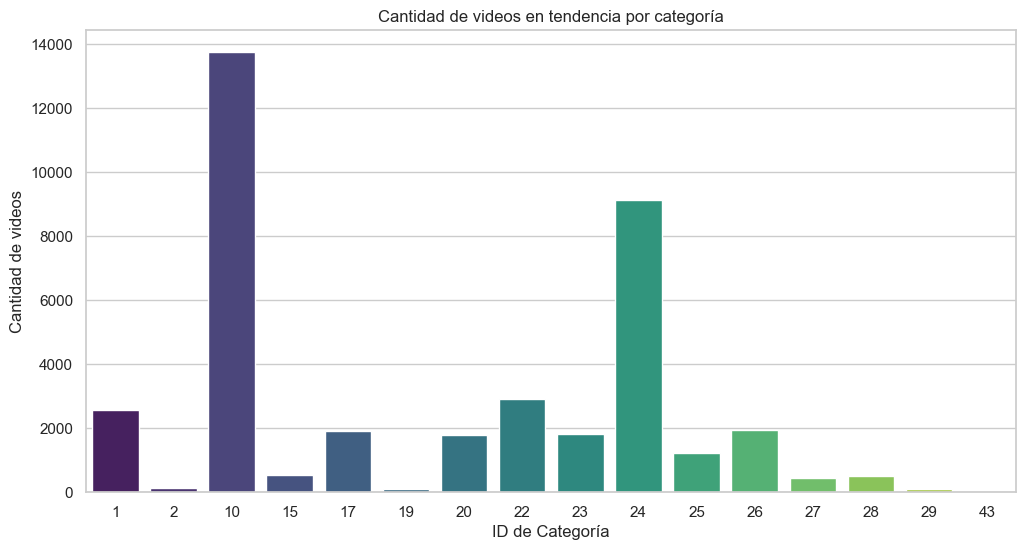

In [7]:
tendencias_por_categoria = df['category_id'].value_counts().sort_values(ascending=False)

sns.barplot(x=tendencias_por_categoria.index, y=tendencias_por_categoria.values, palette="viridis")
plt.title("Cantidad de videos en tendencia por categoría")
plt.xlabel("ID de Categoría")
plt.ylabel("Cantidad de videos")
plt.show()


Pregunta 2

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\2045151287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_por_categoria.index, y=likes_por_categoria.values, palette="Blues_r")


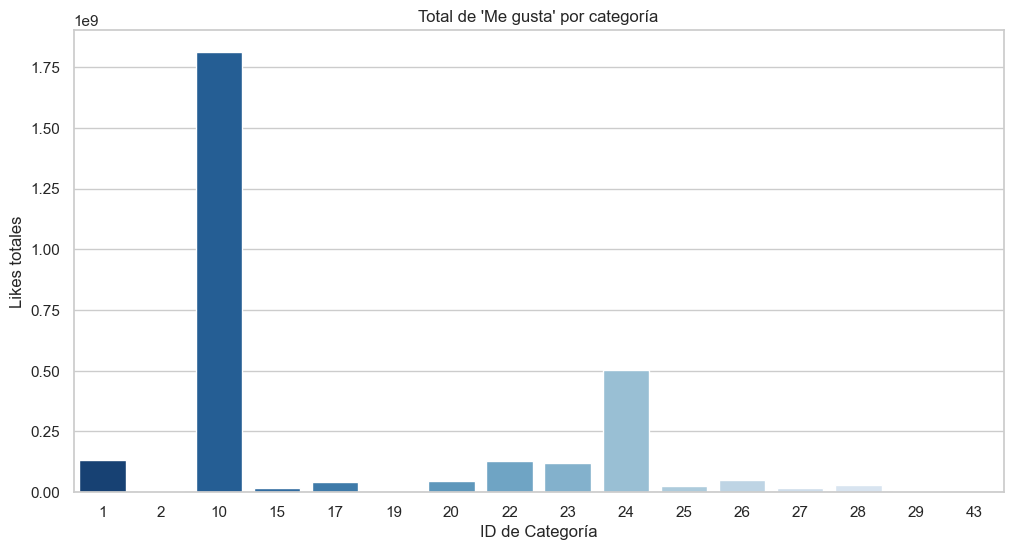

In [8]:
likes_por_categoria = df.groupby('category_id')['likes'].sum().sort_values(ascending=False)

sns.barplot(x=likes_por_categoria.index, y=likes_por_categoria.values, palette="Blues_r")
plt.title("Total de 'Me gusta' por categoría")
plt.xlabel("ID de Categoría")
plt.ylabel("Likes totales")
plt.show()


Pregunta 3

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\243539031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_por_categoria.index, y=ratio_por_categoria.values, palette="coolwarm")


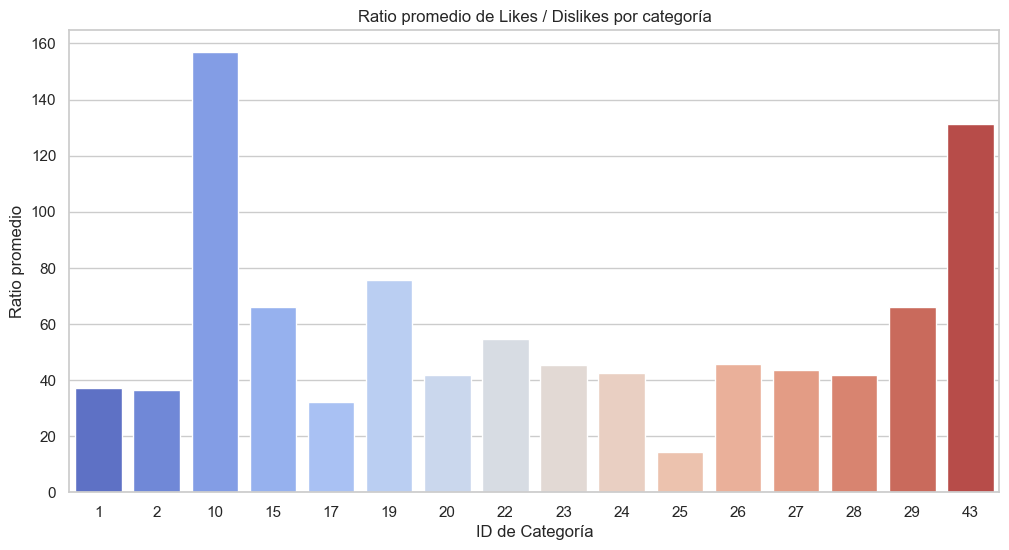

In [9]:
df['ratio_likes_dislikes'] = df['likes'] / (df['dislikes'] + 1)  # evitamos división por 0

ratio_por_categoria = df.groupby('category_id')['ratio_likes_dislikes'].mean().sort_values(ascending=False)

sns.barplot(x=ratio_por_categoria.index, y=ratio_por_categoria.values, palette="coolwarm")
plt.title("Ratio promedio de Likes / Dislikes por categoría")
plt.xlabel("ID de Categoría")
plt.ylabel("Ratio promedio")
plt.show()


Pregunta 4

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\3060577673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_vc.index, y=ratio_vc.values, palette="crest")


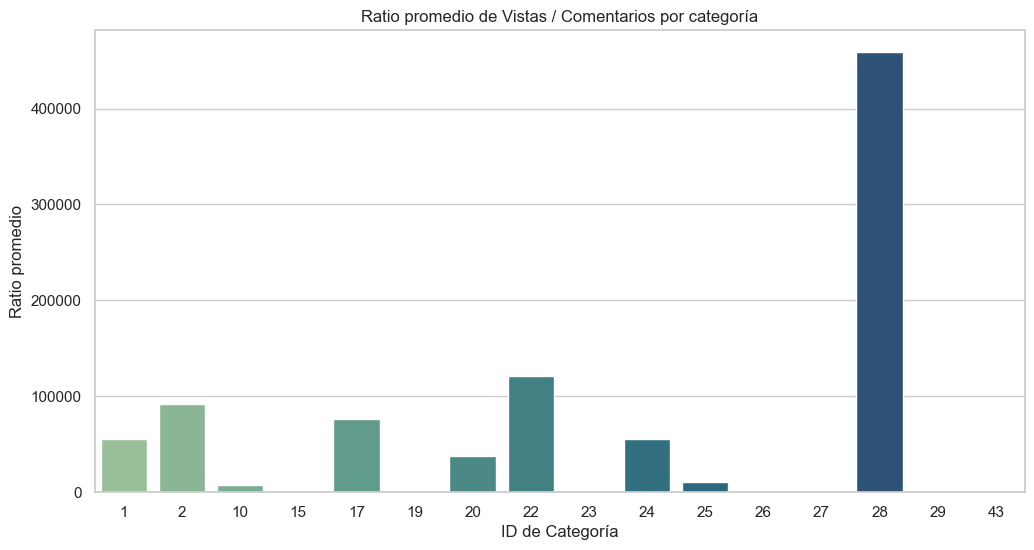

In [10]:
df['ratio_views_comments'] = df['views'] / (df['comment_count'] + 1)

ratio_vc = df.groupby('category_id')['ratio_views_comments'].mean().sort_values(ascending=False)

sns.barplot(x=ratio_vc.index, y=ratio_vc.values, palette="crest")
plt.title("Ratio promedio de Vistas / Comentarios por categoría")
plt.xlabel("ID de Categoría")
plt.ylabel("Ratio promedio")
plt.show()


Pregunta 5

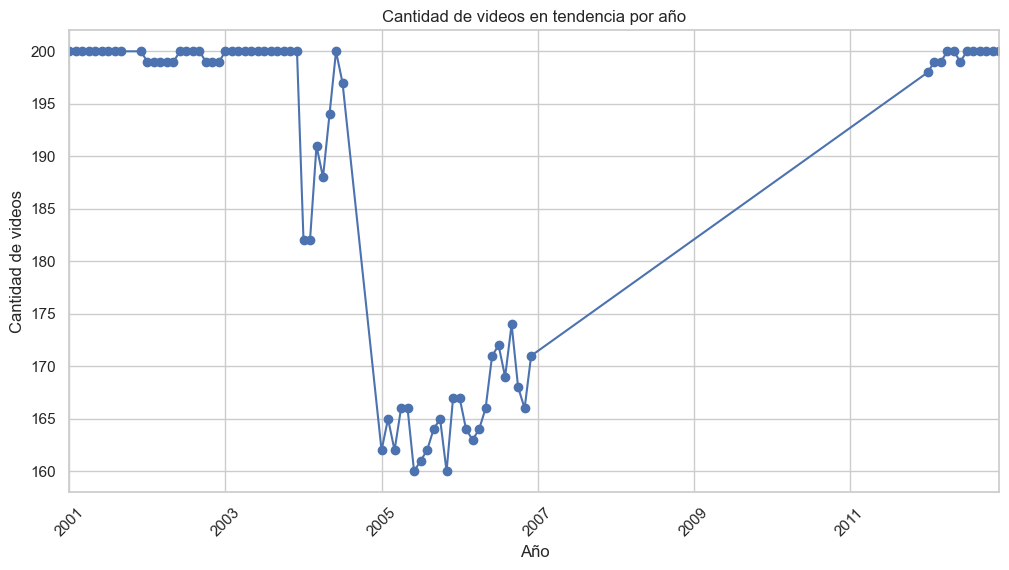

In [11]:
# Convertimos trending_date a datetime si no lo está
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

# Agrupamos por mes
df['trending_year'] = df['trending_date'].dt.to_period('M')

tendencias_por_mes = df['trending_year'].value_counts().sort_index()

tendencias_por_mes.plot(kind='line', marker='o')
plt.title("Cantidad de videos en tendencia por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de videos")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Pregunta 6

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\2707365291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=canales_top.index, x=canales_top.values, palette="mako")


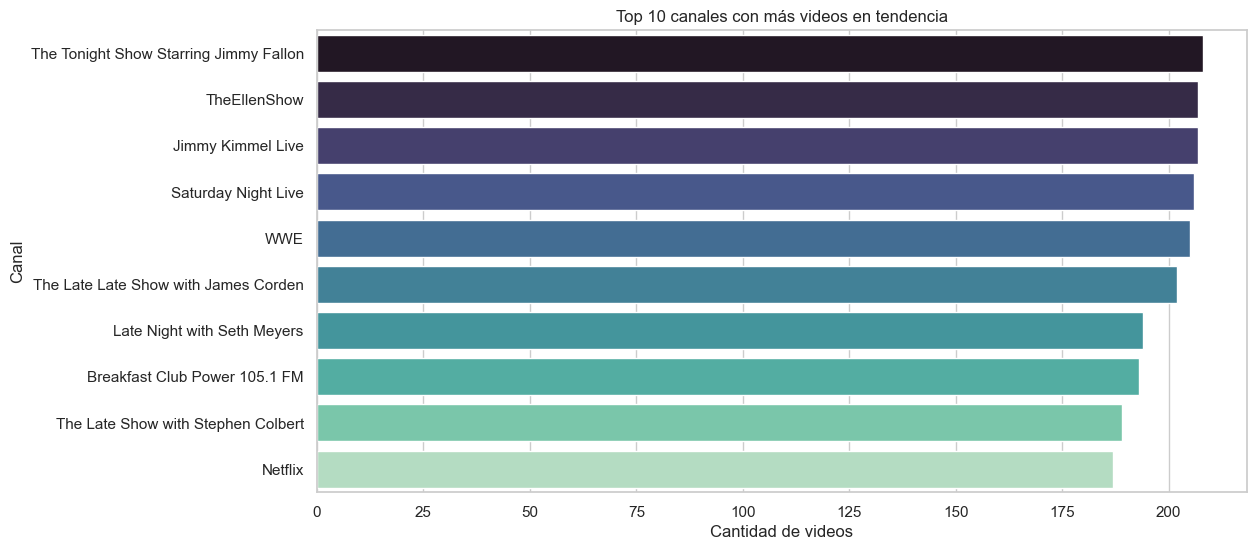

In [12]:
canales_top = df['channel_title'].value_counts().head(10)

sns.barplot(y=canales_top.index, x=canales_top.values, palette="mako")
plt.title("Top 10 canales con más videos en tendencia")
plt.xlabel("Cantidad de videos")
plt.ylabel("Canal")
plt.show()


Pregunta 7

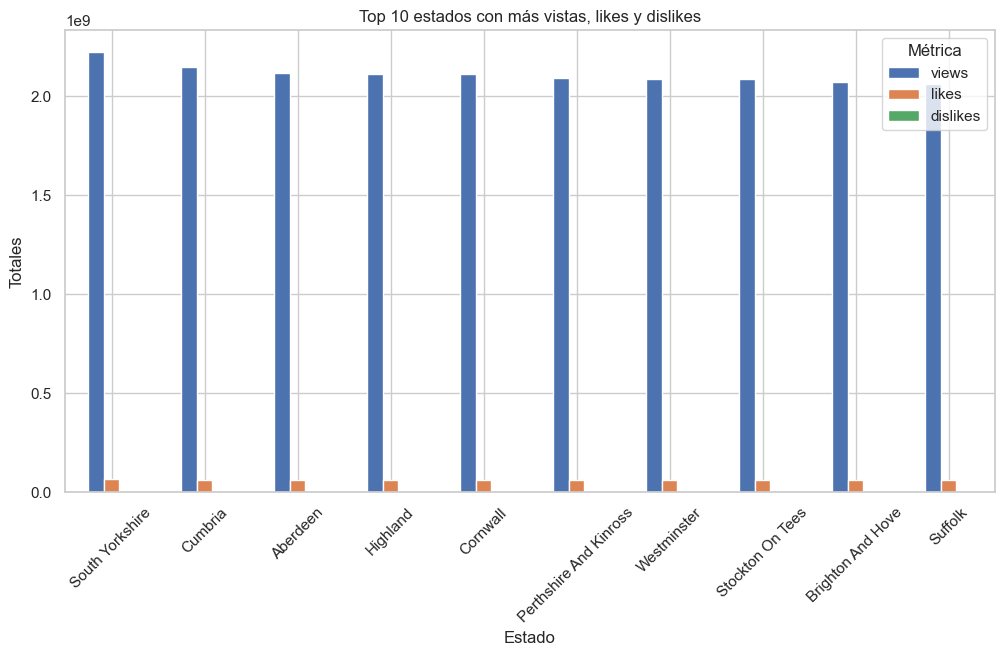

In [13]:
por_estado = df.groupby('state')[['views', 'likes', 'dislikes']].sum().sort_values('views', ascending=False).head(10)

por_estado.plot(kind='bar')
plt.title("Top 10 estados con más vistas, likes y dislikes")
plt.xlabel("Estado")
plt.ylabel("Totales")
plt.xticks(rotation=45)
plt.legend(title="Métrica")
plt.show()


Pregunta 8

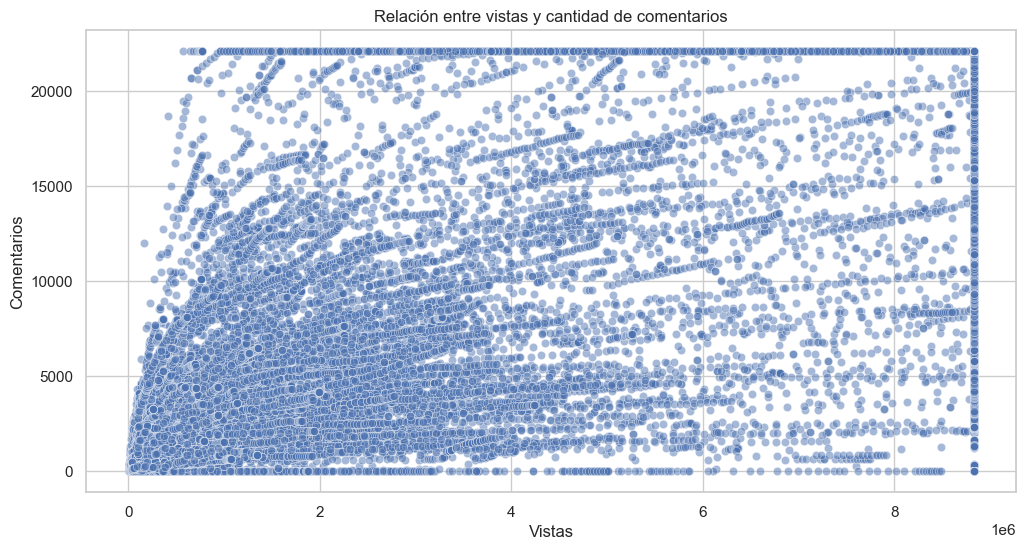

In [14]:
sns.scatterplot(x='views', y='comment_count', data=df, alpha=0.5)
plt.title("Relación entre vistas y cantidad de comentarios")
plt.xlabel("Vistas")
plt.ylabel("Comentarios")
plt.show()


Pregunta 9

INSIGHTS

Insight 1: Categorías más vistas

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_6452\2820831455.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias_vistas.values, y=top_categorias_vistas.index, palette='viridis')


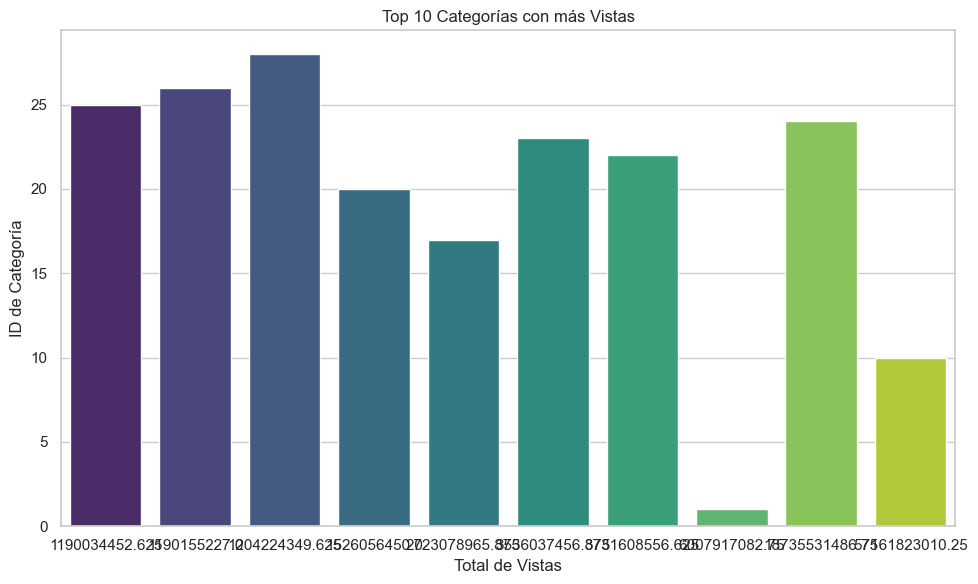

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

top_categorias_vistas = df.groupby('category_id')['views'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categorias_vistas.values, y=top_categorias_vistas.index, palette='viridis')
plt.title('Top 10 Categorías con más Vistas')
plt.xlabel('Total de Vistas')
plt.ylabel('ID de Categoría')
plt.tight_layout()
plt.show()


Insight 2: Categorías con mejor ratio de Likes/Dislikes

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_6452\1280041033.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_like_ratio.values, y=top_like_ratio.index, palette='Blues_d')


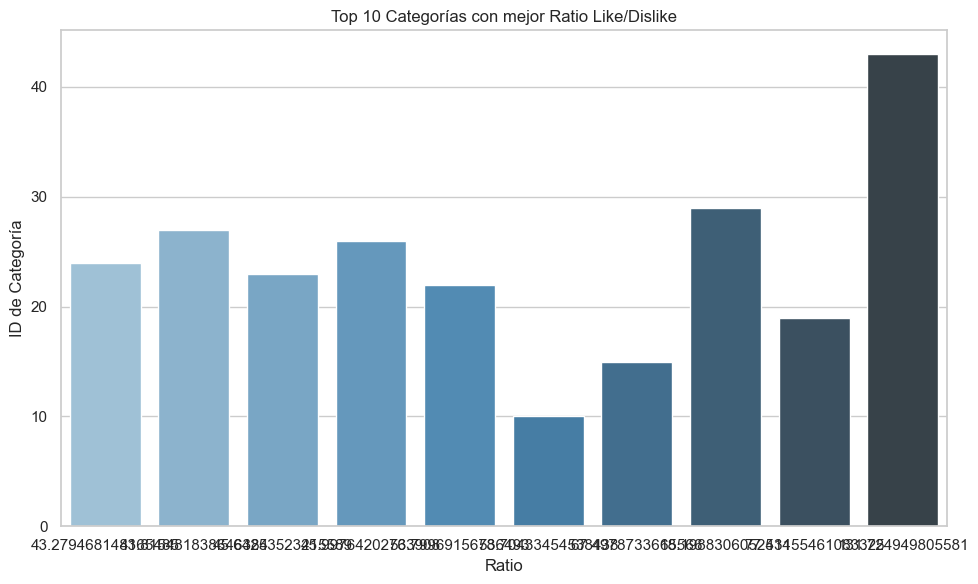

In [5]:
df_ratio = df[df['dislikes'] != 0].copy()
df_ratio['like_dislike_ratio'] = df_ratio['likes'] / df_ratio['dislikes']
top_like_ratio = df_ratio.groupby('category_id')['like_dislike_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_like_ratio.values, y=top_like_ratio.index, palette='Blues_d')
plt.title('Top 10 Categorías con mejor Ratio Like/Dislike')
plt.xlabel('Ratio')
plt.ylabel('ID de Categoría')
plt.tight_layout()
plt.show()

Insight 3: Ratio de Vistas/Comentarios por categoría

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_6452\1780533556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_views_comments.values, y=top_views_comments.index, palette='mako')


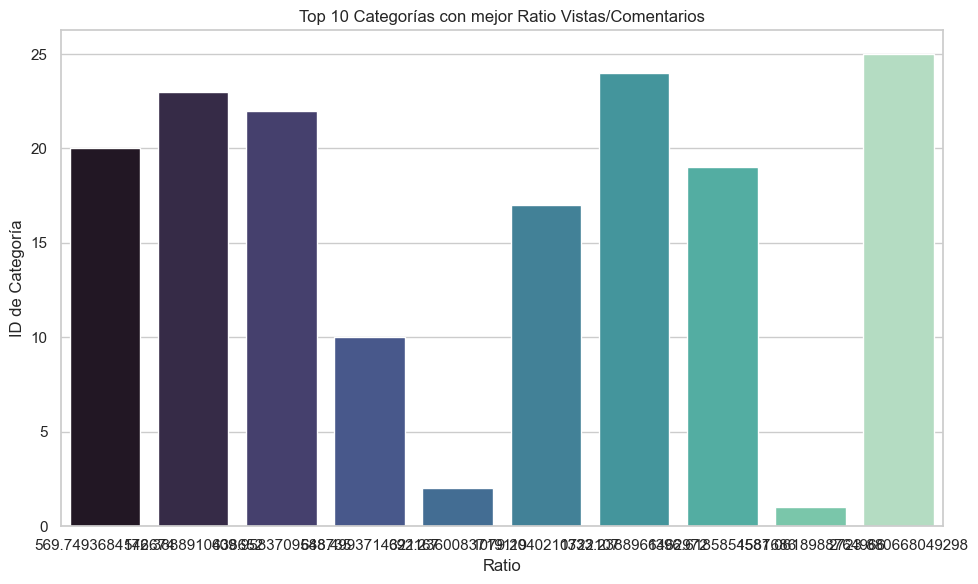

In [6]:
df_ratio2 = df[df['comment_count'] != 0].copy()
df_ratio2['views_comments_ratio'] = df_ratio2['views'] / df_ratio2['comment_count']
top_views_comments = df_ratio2.groupby('category_id')['views_comments_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_views_comments.values, y=top_views_comments.index, palette='mako')
plt.title('Top 10 Categorías con mejor Ratio Vistas/Comentarios')
plt.xlabel('Ratio')
plt.ylabel('ID de Categoría')
plt.tight_layout()
plt.show()

Insight 4: Volumen de videos en tendencia a lo largo del tiempo

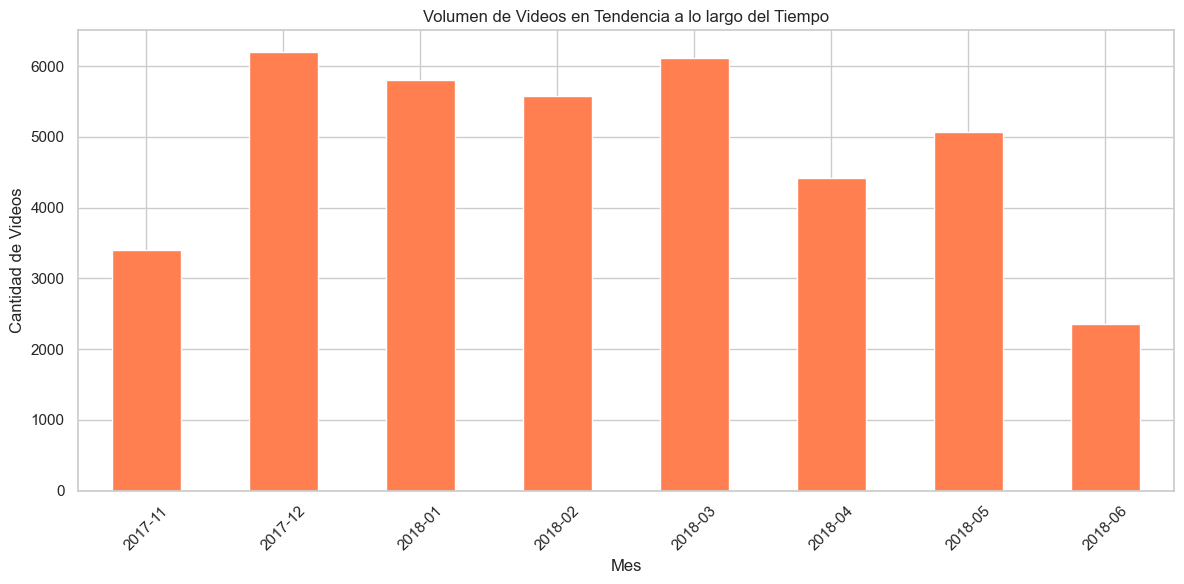

In [7]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

trending_by_month = df['trending_date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12,6))
trending_by_month.plot(kind='bar', color='coral')
plt.title('Volumen de Videos en Tendencia a lo largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight 5: Canales más frecuentes en tendencia

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_6452\1329653038.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=videos_por_dia.index, y=videos_por_dia.values, palette='pastel')


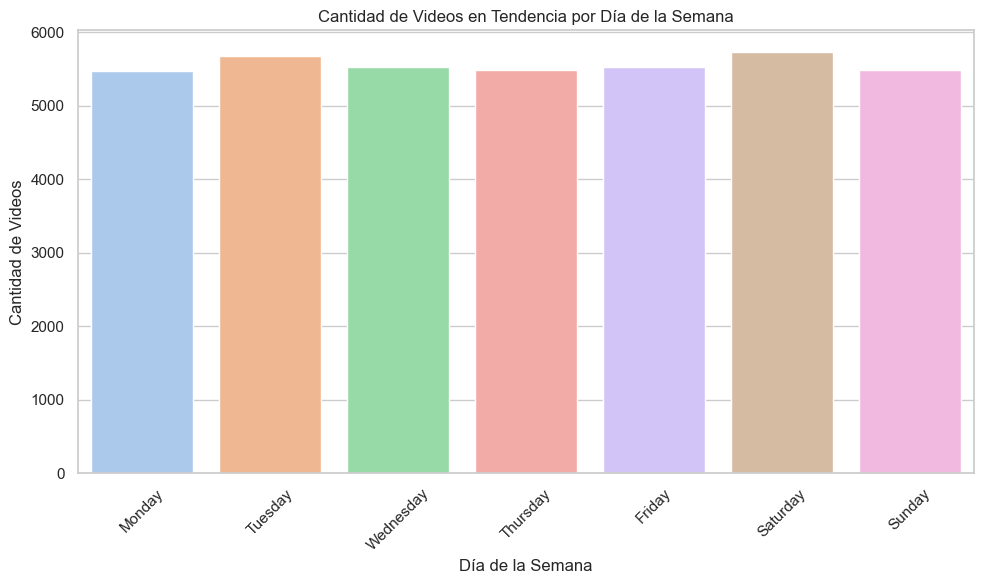

In [12]:
# Asegurarte que trending_date esté en formato datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# Crear una nueva columna con el nombre del día de la semana
df['trending_day'] = df['trending_date'].dt.day_name()

# Contar cuántos videos fueron tendencia por día
videos_por_dia = df['trending_day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Imprimir los resultados numéricos
#print("Cantidad de videos en tendencia por día de la semana:")
#print(videos_por_dia)

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x=videos_por_dia.index, y=videos_por_dia.values, palette='pastel')
plt.title('Cantidad de Videos en Tendencia por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight 6: Estados con más vistas

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_6452\914518978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states_views.values, y=top_states_views.index, palette='cubehelix')


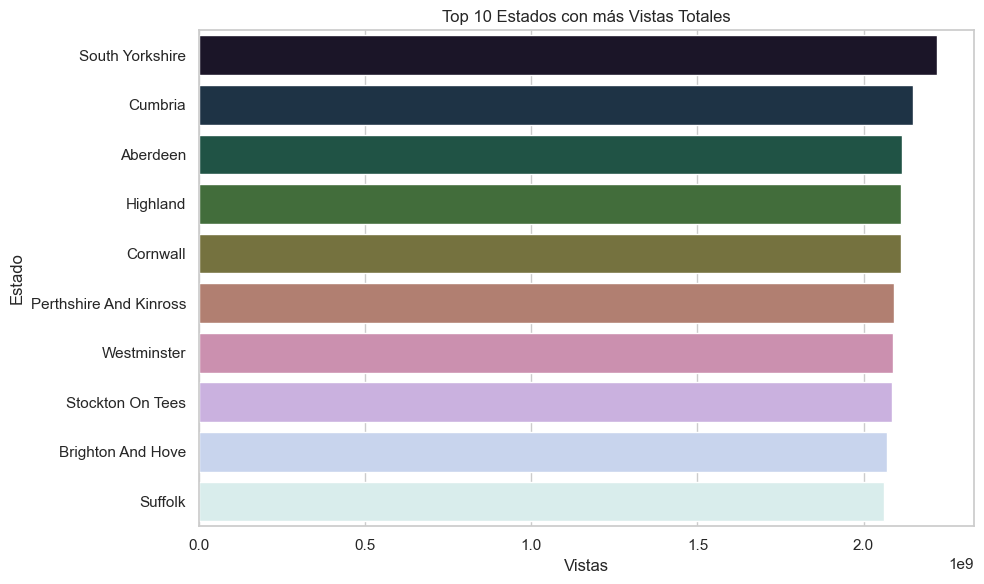

In [9]:
top_states_views = df.groupby('state')['views'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_states_views.values, y=top_states_views.index, palette='cubehelix')
plt.title('Top 10 Estados con más Vistas Totales')
plt.xlabel('Vistas')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


## Insight 7: clasificación por tendencia

In [1]:
import pandas as pd
df = pd.read_csv('dataset_completo_con_ratios.csv')

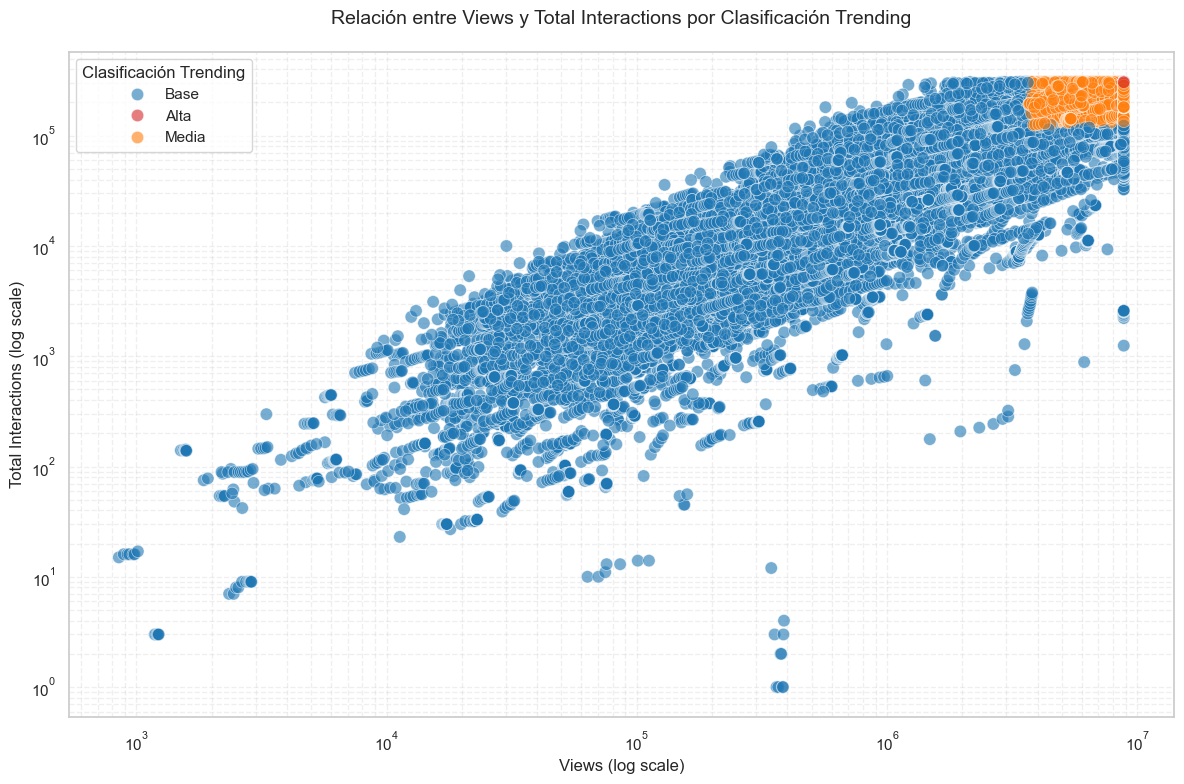

In [4]:
# Código para scatterplot de total_interactions vs views agrupado por trending_clasify
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Crear el scatter plot con escala logarítmica
scatter = sns.scatterplot(
    data=df,
    x='views',
    y='total_interactions',
    hue='trending_clasify',
    palette={'Base': '#1f77b4', 'Media': '#ff7f0e', 'Alta': '#d62728'},
    alpha=0.6,
    s=80,
    edgecolor='w',
    linewidth=0.5
)

# Aplicar escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

# Añadir títulos y etiquetas
plt.title('Relación entre Views y Total Interactions por Clasificación Trending', fontsize=14, pad=20)
plt.xlabel('Views (log scale)', fontsize=12)
plt.ylabel('Total Interactions (log scale)', fontsize=12)

# Personalizar la leyenda
plt.legend(
    title='Clasificación Trending',
    title_fontsize=12,
    fontsize=11,
    frameon=True,
    framealpha=0.8
)

# Añadir grid
plt.grid(True, which="both", ls="--", alpha=0.3)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

### Clasificación de los videos según su tendencia:
La clasificación de tendencia, basada en percentiles conjuntos de vistas e interacciones totales, revela una clara relación entre ambos indicadores.

- Los videos en tendencia “Alta” (percentil 90–100) se concentran en la zona con más vistas y mayor cantidad de interacciones, ubicándose en el extremo superior derecho del gráfico.

- Los de tendencia “Media” (percentil 75–90) ocupan una franja intermedia, indicando buen rendimiento en ambas métricas.

- La mayoría de videos pertenece a la tendencia “Base” (percentil 0–75), con niveles más bajos de vistas e interacciones.

Esto muestra que un video para ser altamente “tendencial” no solo debe tener muchas vistas o muchas interacciones por separado, sino destacar simultáneamente en ambas métricas.


📊 Distribución de Videos por Nivel de Tendencia:


,Cantidad de Videos,Porcentaje (%)
trending_clasify,,
Base,31067,79.83
Media,4564,11.73
Alta,3285,8.44


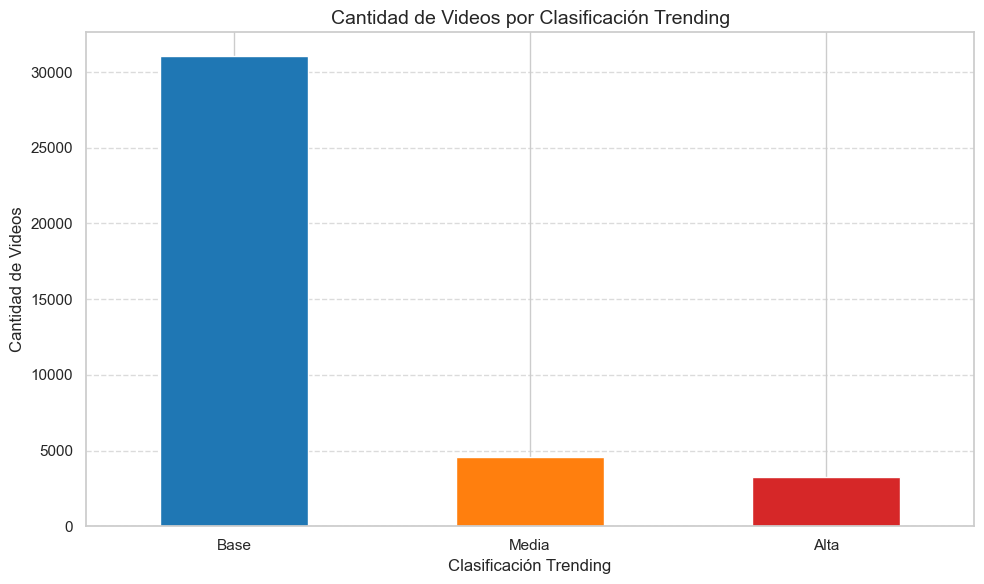

In [5]:
# cantidad de videos por trending_clasify
conteo_tendencia = df['trending_clasify'].value_counts()

# Calcular el porcentaje
porcentaje_tendencia = (conteo_tendencia / len(df)) * 100

# Crear un DataFrame con el conteo y el porcentaje
tabla_tendencia = pd.DataFrame({
    'Cantidad de Videos': conteo_tendencia,
    'Porcentaje (%)': porcentaje_tendencia.round(2)
})

# Mostrar la tabla
print("\n📊 Distribución de Videos por Nivel de Tendencia:")
display(tabla_tendencia)

df['trending_clasify'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#d62728'], figsize=(10, 6))
plt.title('Cantidad de Videos por Clasificación Trending', fontsize=14)
plt.xlabel('Clasificación Trending', fontsize=12)
plt.ylabel('Cantidad de Videos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aunque en el gráfico parece que hay pocos videos en “Media” y “Alta”, eso se debe a que usamos una escala logarítmica, que comprime los valores grandes para que todo quepa en una sola imagen.

Pero en realidad, hay más de 7,800 videos clasificados como Media o Alta tendencia, lo que representa casi el 20% del total:

🟦 Base: 79.83% (más de 31,000 videos)

🟧 Media: 11.73% (más de 4,500 videos)

🔴 Alta: 8.44% (más de 3,200 videos)

## Insight 8: Volumen de videos en tendencia a lo largo del tiempo

C:\Users\JAIRO\AppData\Local\Temp\ipykernel_26368\2256540242.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['trending_date'] = pd.to_datetime(df_filtrado['trending_date'], format='%y.%d.%m', errors='coerce')


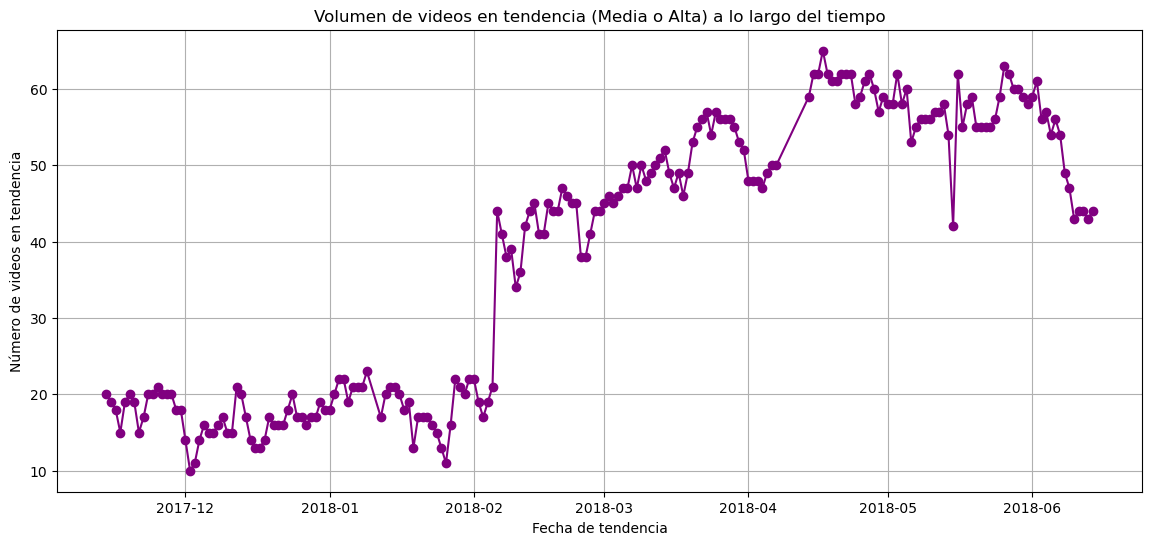

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo videos con tendencia Media o Alta
df_filtrado = df[df['trending_clasify'].isin(['Media', 'Alta'])]

# Asegurarse de que las fechas estén en formato datetime
df_filtrado['trending_date'] = pd.to_datetime(df_filtrado['trending_date'], format='%y.%d.%m', errors='coerce')

# Agrupar por fecha de tendencia y contar videos por día
videos_per_day = df_filtrado.groupby('trending_date').size()

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(videos_per_day.index, videos_per_day.values, marker='o', color='purple')
plt.title('Volumen de videos en tendencia (Media o Alta) a lo largo del tiempo')
plt.xlabel('Fecha de tendencia')
plt.ylabel('Número de videos en tendencia')
plt.grid(True)
plt.show()


### 📈 Evolución del volumen de videos en tendencia (Media y Alta)

Al analizar la evolución temporal del volumen de videos clasificados como **Media** y **Alta tendencia**, se observa que la cantidad de videos en estas categorías ha presentado **variaciones importantes a lo largo del tiempo**.

En ciertos periodos, se detectan **picos significativos de videos en tendencia**, lo que podría estar asociado a eventos relevantes, lanzamientos importantes o contenido estacional con mayor capacidad de viralización. Estos picos reflejan momentos de alta actividad y atención por parte de la audiencia.

Por otro lado, existen también **fases de menor volumen**, que podrían indicar lapsos de menor producción de contenido altamente relevante o cambios en las preferencias de los usuarios.

Este comportamiento sugiere que el volumen de videos con alto nivel de tendencia no es constante, sino que sigue **patrones dinámicos y posiblemente cíclicos**, lo cual es importante considerar para la planificación de contenido y la optimización de estrategias de publicación.

Un análisis más detallado por categorías o canales podría revelar qué tipo de contenido impulsa estos aumentos en volumen y ayudar a predecir futuros picos de tendencia.
